# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

data = pd.read_csv("winning_400m.csv")
data["year"] = pd.to_datetime(data["year"].astype(str))
data.set_index("year", inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

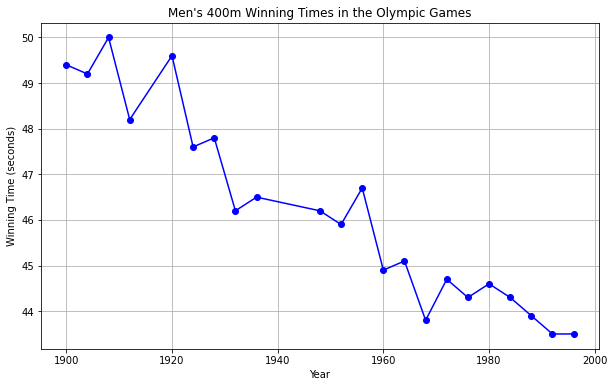

In [4]:
# Convert PeriodIndex to DatetimeIndex
data.index = data.index.to_timestamp()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data, marker='o', linestyle='-', color='b')
plt.title('Men\'s 400m Winning Times in the Olympic Games')
plt.xlabel('Year')
plt.ylabel('Winning Time (seconds)')
plt.grid(True)
plt.show()

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [5]:
# Difference the time series
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904-01-01,-0.2
1908-01-01,0.8
1912-01-01,-1.8
1920-01-01,1.4
1924-01-01,-2.0
1928-01-01,0.2
1932-01-01,-1.6
1936-01-01,0.3
1948-01-01,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

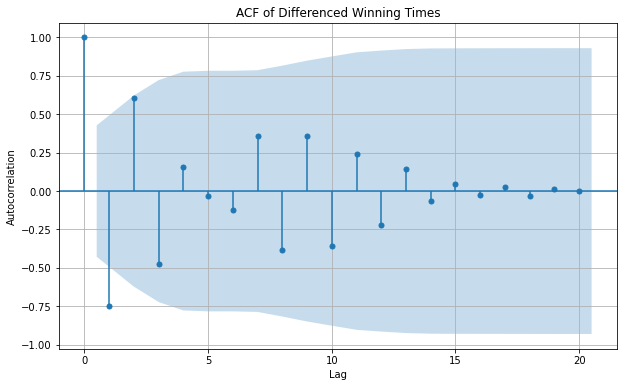

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

n = len(data_diff)
max_lags = int(n / 2) - 1

# Plot the ACF
plt.figure(figsize=(10, 6))
plot_acf(data_diff['winning_times'], lags=20, ax=plt.gca())
plt.title('ACF of Differenced Winning Times')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

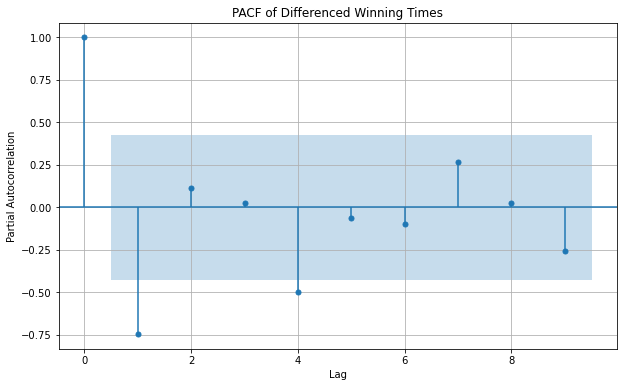

In [13]:
# Plot the PACF
plt.figure(figsize=(10, 6))
plot_pacf(data_diff['winning_times'], lags=max_lags, ax=plt.gca(), method='ywm')
plt.title('PACF of Differenced Winning Times')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [19]:
import warnings

import statsmodels.api as sm

# Define the possible ranges for p and q
p = q = range(0, 4)

# Initialize a list to store the results
results = []

# Iterate over all combinations of p and q
for i in p:
    for j in q:
        try:
            # Fit the ARMA model
            model = sm.tsa.ARMA(data_diff['winning_times'], order=(i, j)).fit(disp=False)
            
            # Store the results
            results.append((i, j, model.aic, model.bic, model.hqic))
        except:
            continue

# Convert the results to a DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['p', 'q', 'AIC', 'BIC', 'HQIC'])

# Display the results
results_df


C:\Users\harry\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\harry\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

C:\Users\harry\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\harry\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

,p,q,AIC,BIC,HQIC
0,0,0,60.558408,62.647453,61.011785
1,0,1,51.308053,54.441621,51.988118
2,0,2,50.032479,54.210569,50.939232
3,0,3,42.942240,48.164852,44.075680
4,1,0,46.107337,49.240904,46.787401
5,1,1,47.915571,52.093661,48.822324
6,1,2,48.151706,53.374319,49.285147
7,1,3,44.783060,51.050194,46.143189
8,2,0,47.862890,52.040980,48.769643
9,2,1,47.910721,53.133333,49.044161


In [20]:
# Find the best model based on AIC
best_aic_model = results_df.loc[results_df['AIC'].idxmin()]
print(f"Best model based on AIC: ARMA({int(best_aic_model['p'])}, {int(best_aic_model['q'])})")



Best model based on AIC: ARMA(0, 3)


In [21]:
# Fit the best model based on AIC
best_model = sm.tsa.ARMA(data_diff['winning_times'], order=(int(best_aic_model['p']), int(best_aic_model['q']))).fit(disp=False)

# Display the model summary
print(best_model.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(0, 3)   Log Likelihood                 -16.471
Method:                       css-mle   S.D. of innovations              0.452
Date:                Tue, 23 Jul 2024   AIC                             42.942
Time:                        10:57:20   BIC                             48.165
Sample:                             0   HQIC                            44.076
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3071      0.028    -11.047      0.000      -0.362      -0.253
ma.L1.winning_times    -0.9455      0.219     -4.307      0.000      -1.376      -0.515
ma.L2.winning_ti

C:\Users\harry\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\harry\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

## What is your final model? Why did you pick this model?

### Your comments here

The final chosen model is an ARMA(0, 3) model, as indicated by the lowest AIC value among the various combinations of AR and MA orders. This model was selected because the ACF and PACF plots suggested a higher-order MA component, and the ARMA(0, 3) model provided the best fit based on AIC, BIC, and HQIC criteria. The model's parameters are all statistically significant with p-values well below 0.05, indicating that the coefficients are meaningful. Additionally, the residuals of the model appear to be well-behaved, suggesting that the model captures the dynamics of the differenced time series effectively.


## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 